# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

# Persiapan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [3]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

13520133 - Jevant Jedidia Augustine: 1, 2, 3, 4, 5
13520160 - Willy Wilsen: 1, 2, 3, 4, 5

In [4]:
#1 Buatlah baseline dengan menggunakan model logistic regression.
lr = LogisticRegression(random_state=123).fit(X_train, y_train)

In [5]:
# 2. Analisis data

# Duplicate value
print(data.duplicated().sum())
print("Terdapat beberapa data duplikat pada dataset keseluruhan yang diberikan")

7253
Terdapat beberapa data duplikat pada dataset keseluruhan yang diberikan


In [6]:
# Missing value
print(data.isnull().sum())
print("Tidak terdapat missing values pada dataset keseluruhan yang diberikan")

hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
raining       0
dtype: int64
Tidak terdapat missing values pada dataset keseluruhan yang diberikan


In [7]:
# Outlier
dataNum = data.select_dtypes(include=[np.number])
Q1 = dataNum.quantile(0.25)
Q3 = dataNum.quantile(0.75)
IQR = Q3 - Q1
print(((dataNum < (Q1 - 1.5 * IQR)) | (dataNum > (Q3 + 1.5 * IQR))).sum())
print("Fitur hour dan wind_deg tidak memiliki outlier tetapi fitur lainnya memiliki \noutlier yang dapat dibilang relatif kecil bila dibandingkan dengan ukuran data keseluruhan")

hour             0
temp          1458
temp_min      1716
temp_max       547
pressure      1067
humidity       231
wind_speed    3439
wind_deg         0
dtype: int64
Fitur hour dan wind_deg tidak memiliki outlier tetapi fitur lainnya memiliki 
outlier yang dapat dibilang relatif kecil bila dibandingkan dengan ukuran data keseluruhan


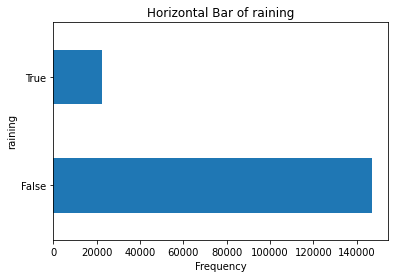

Terdapat ketidakseimbangan pada data latih
Label False pada raining sangat besar apabila dibandingkan dengan label True


In [8]:
# Balance of data
df_train['raining'].value_counts(dropna = True).plot(kind='barh')
plt.title('Horizontal Bar of raining')
plt.xlabel('Frequency')
plt.ylabel('raining')
plt.show()

print("Terdapat ketidakseimbangan pada data latih")
print("Label False pada raining sangat besar apabila dibandingkan dengan label True")

In [9]:
# 3. Rencana penanganan data

# Duplikat data
print("Rencana untuk menangani duplikat data:")
print("Data yang duplikat akan dibuang")
print()

# Missing value
print("Rencana untuk menangani missing value:")
print("Tidak terdapat missing values pada data yang diberikan, maka tidak perlu ditangani")
print()

# Outlier
print("Rencana untuk menangani outlier:")
print("Karena jumlah outlier relatif kecil terhadap jumlah dataset, maka tidak perlu ditangani")
print()

# Balance of data
print("Rencana untuk menangani imbalanced data:")
print("Dilakukan oversampling atau undersampling pada dataset")

Rencana untuk menangani duplikat data:
Data yang duplikat akan dibuang

Rencana untuk menangani missing value:
Tidak terdapat missing values pada data yang diberikan, maka tidak perlu ditangani

Rencana untuk menangani outlier:
Karena jumlah outlier relatif kecil terhadap jumlah dataset, maka tidak perlu ditangani

Rencana untuk menangani imbalanced data:
Dilakukan oversampling atau undersampling pada dataset


In [10]:
#4 Jelaskan teknik encoding yang digunakan terhadap data yang disediakan, disertai dengan alasan.
print("Karena data kategorical hanyalah pada target (yang merupakan jenis data biner)\nmaka hanya dibutuhkan encoding pada target, True menjadi 1 dan False menjadi 0")

Karena data kategorical hanyalah pada target (yang merupakan jenis data biner)
maka hanya dibutuhkan encoding pada target, True menjadi 1 dan False menjadi 0


In [11]:
#5 Buatlah desain eksperimen dengan menentukan hal berikut
print("Tujuan dari eksperimen adalah untuk membuat sebuah model yang dapat memprediksi\napakah akan hujan berdasarkan beberapa variabel masukan")

print("\nVariabel dependen adalah 'hour', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',\n'wind_speed', dan 'wind_deg'.")
print("Variabel independen adalah 'raining'")

print("\nStrategi eksperimen:")
print("1. Membuang data yang duplikat")
print("2. Dilakukan oversampling untuk mengatasi imbalanced data")
print("3. Melakukan encoding pada target")
print("4. Membagi data menjadi data latih, data validasi, dan data test")
print("5. Menggunakan Logistic Regression untuk membuat model dari data latih")
print("6. Menggunakan hyperparameter tuning dengan Grid Search untuk menemukan parameter terbaik dari Logistic Regression")
print("7. Melakukan skema validasi terhadap model yang dibuat")
print("8. Menghitung nilai metrik dan confusion matrix dari model")

print("\nSkema validasi yang digunakan adalah K-fold cross-validation")

Tujuan dari eksperimen adalah untuk membuat sebuah model yang dapat memprediksi
apakah akan hujan berdasarkan beberapa variabel masukan

Variabel dependen adalah 'hour', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
'wind_speed', dan 'wind_deg'.
Variabel independen adalah 'raining'

Strategi eksperimen:
1. Membuang data yang duplikat
2. Dilakukan oversampling untuk mengatasi imbalanced data
3. Melakukan encoding pada target
4. Membagi data menjadi data latih, data validasi, dan data test
5. Menggunakan Logistic Regression untuk membuat model dari data latih
6. Menggunakan hyperparameter tuning dengan Grid Search untuk menemukan parameter terbaik dari Logistic Regression
7. Melakukan skema validasi terhadap model yang dibuat
8. Menghitung nilai metrik dan confusion matrix dari model

Skema validasi yang digunakan adalah K-fold cross-validation


# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=593cb2cb-2a6b-480f-8c79-945ae194dd93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>